In [223]:
import numpy as np     #para operaciones con vectores y matrices.
import matplotlib.pyplot as plt         # (plt): para graficar
from scipy import signal  #para usar la función lfilter que aplica el filtro

Las ecuaciuones en diferencias con coeficientes constantes o las CCDE por su abreviatura en ingles se pueden resolver de forma iterativa
Si existe un termino "Y" en el sistema entonces es recursivo IIR

# Ecuacion diferencial 
 y[n]-1.5⋅y[n−1]+0.5⋅y[n−2]  = 3⋅10−2⋅x[n]+5⋅10−2⋅x[n−1]+3⋅10−2⋅x[n−2] 

In [224]:
#Defino Los coeficientes de X con B y de Y con A
b = np.array([0.03, 0.05, 0.03])   # coeficientes de la entrada
a = np.array([1.0, -1.5, 0.5])     # coeficientes de la salida


# Configurar la simulación

    Frecuencia de muestreo (fs): cuantas muestras por segundo.
    Tiempo de simulación (T): cuanto tiempo (en segundos) queremos simular.
    Numero de muestras (N) = fs * T.

In [225]:
# 2.
fs = 25000         # Frecuencia de muestreo (Hz)
T = 0.005          # Tiempo de simulacion (seg)  
N = int(fs * T)    # Numero total de muestras
t = np.arange(N) / fs  # Vector de tiempo


# Las señales de entrada 4 señales causales 
Teoría:
Un sistema LTI es causal si h(n) = 0 para todo n < 0. Esto significa que en la respuesta al impulso del sistema no existe ninguna muestra con valor diferente de cero para n<0
 

In [226]:
# 3. Generar señales de entrada del TS1 (causales)

f_sin = 2000  # 2kHz

sinusoidal = np.sin(2 * np.pi * f_sin * t)

# b) Sinusoidal amplificada (x2) y desfasada (π/2)
sinusoidal_amp_desf = 2 * np.sin(2 * np.pi * f_sin * t + np.pi/2)

# c) Sinusoidal modulada en amplitud por otra de 1kHz
f_portadora = 1000  # 1kHz
modulada = ( 0.5 * np.sin(2 * np.pi * f_portadora * t)) * np.sin(2 * np.pi * f_sin * t)

# d) Señal modulada recortada al 75%
recortada = np.clip(modulada, -0.75, 0.75)

# e) Señal cuadrada de 4kHz
f_cuad = 4000  # 4kHz
cuadrada = signal.square(2 * np.pi * f_cuad * t)

In [227]:
# Pulso rectangular de 10 ms

pulso = np.zeros(N) # Crear un array de ceros de longitud N

duracion_pulso = 0.01  # 10 milisegundos = 0.01 segundos
muestras_pulso = int(duracion_pulso * fs) # fs = frecuencia de muestreo

pulso[:muestras_pulso] = 1.0

# Cálculo de respuestas
Se uso signal.lfilter para obtener las respuestas del sistema, es decir de Y.

In [228]:
# Calcular las salidas para cada entrada

y_senoidal = signal.lfilter(b, a, sinusoidal)
y_senoidal_amp_desf = signal.lfilter(b, a, sinusoidal_amp_desf)
y_modulada = signal.lfilter(b, a, modulada)
y_recortada = signal.lfilter(b, a, recortada)
y_cuadrada = signal.lfilter(b, a, cuadrada)
y_pulso = signal.lfilter(b, a, pulso)

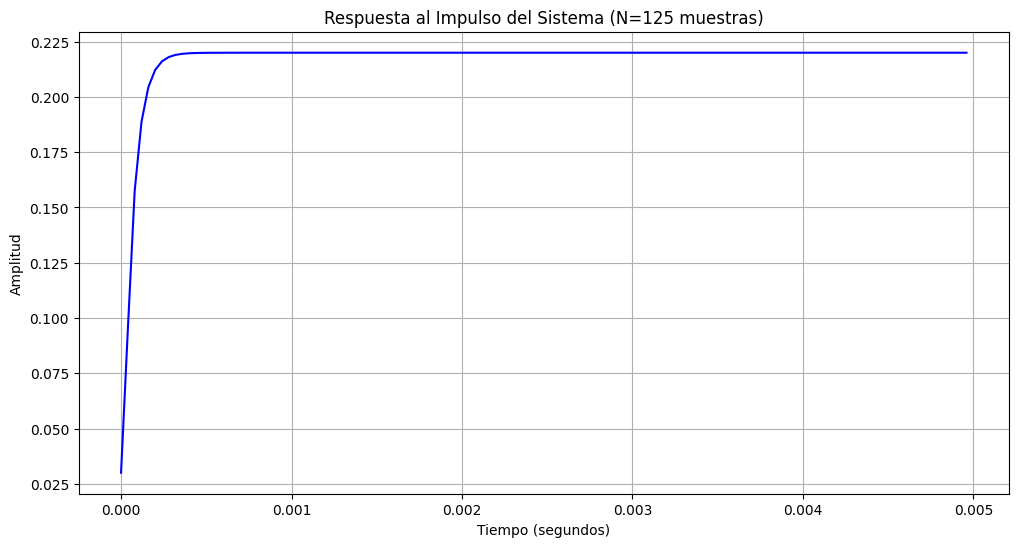

In [229]:
# Calcular la respuesta al impulso Delta
impulso = np.zeros(N)
impulso[0] = 1.0
h = signal.lfilter(b, a, impulso)


# Graficar la respuesta al impulso
plt.figure(figsize=(12, 6))
plt.plot(t, h, 'b-', linewidth=1.5)
plt.title(f'Respuesta al Impulso del Sistema (N={N} muestras)')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# Conclusion 
A pesar de aumentar las muestras h no pareciera converger, debido a esto supongo que es un sistema inestable. 
Todos los no recursivos son estables pero por otro lado para que los sistemas recursivos sean estable tienen que tener respuesta al impulso finita.

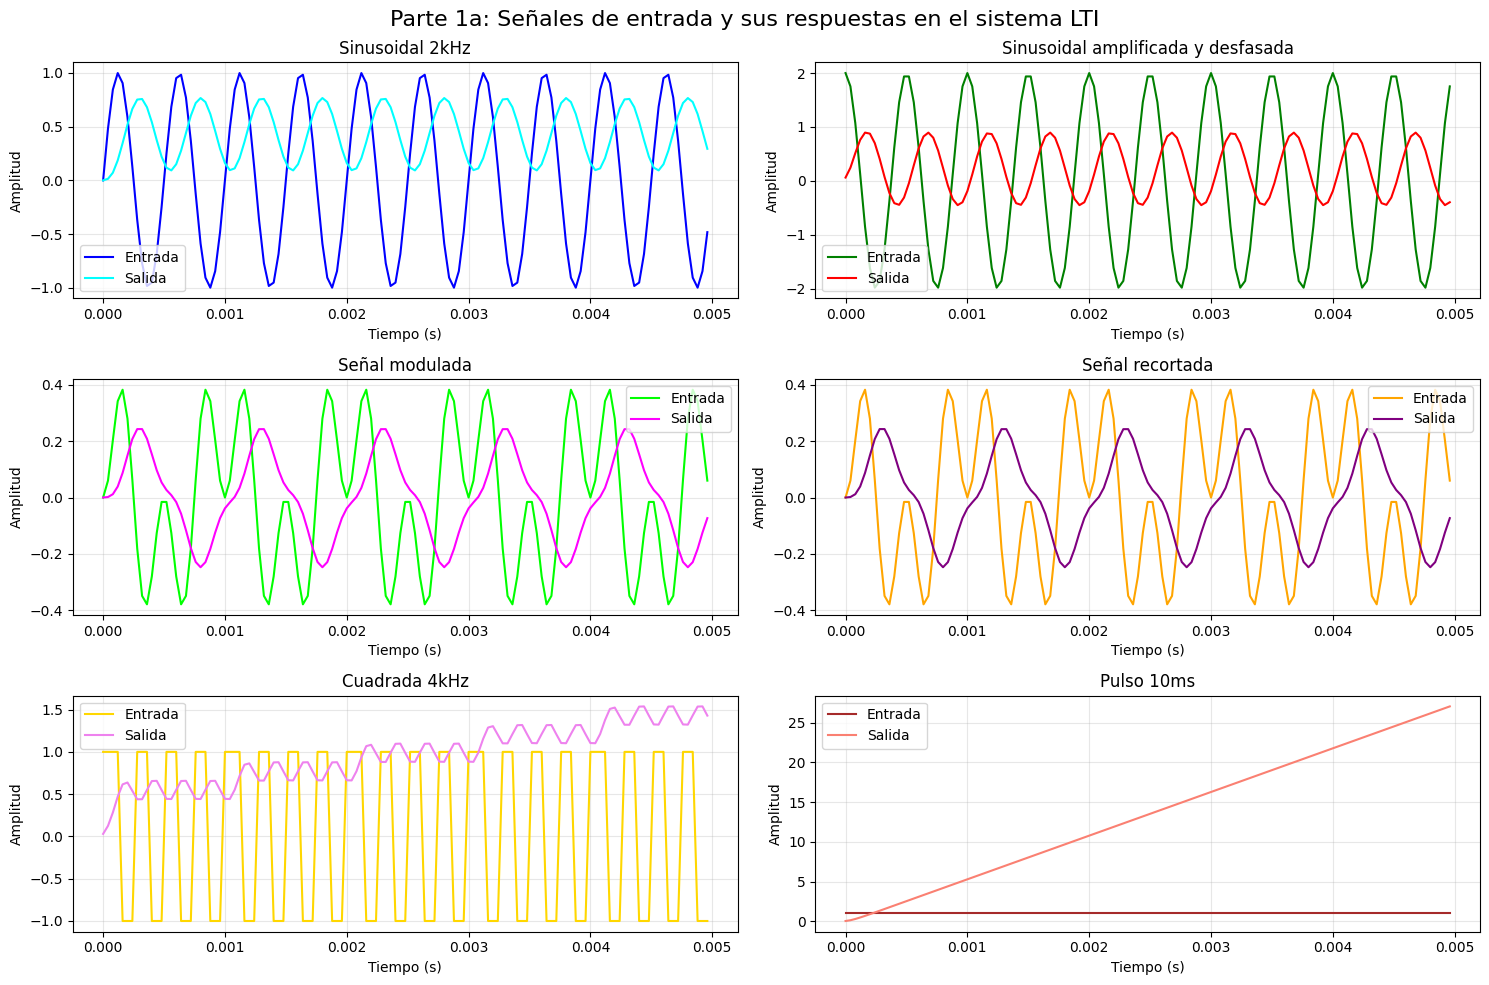

In [230]:

# Graficar las señales de entrada y salida
# Definir colores para las señales
colores_entrada = ['blue', 'green', 'lime', 'orange', 'gold', 'brown']
colores_salida = ['cyan', 'red', 'magenta', 'purple', 'violet', 'salmon']

# Crear la figura y los subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle('Parte 1a: Señales de entrada y sus respuestas en el sistema LTI', fontsize=16)

señales_entrada = [sinusoidal, sinusoidal_amp_desf, modulada, recortada, cuadrada, pulso]
nombres_entrada = [
    "Sinusoidal 2kHz",
    "Sinusoidal amplificada y desfasada",
    "Señal modulada",
    "Señal recortada",
    "Cuadrada 4kHz",
    "Pulso 10ms"
]
salidas_sistema = [y_senoidal, y_senoidal_amp_desf, y_modulada, y_recortada, y_cuadrada, y_pulso]

for i, ax in enumerate(axs.flat):
    # Graficar entrada y salida con colores diferentes
    ax.plot(t, señales_entrada[i], color=colores_entrada[i], label='Entrada', linewidth=1.5)
    ax.plot(t, salidas_sistema[i], color=colores_salida[i], label='Salida', linewidth=1.5)
    ax.set_title(nombres_entrada[i])
    ax.set_xlabel('Tiempo (s)')
    ax.set_ylabel('Amplitud')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Calculamos h[n] aplicando un impulso al sistema.

In [231]:
# Calcular la respuesta al impulso Delta 
impulso = np.zeros(N)
impulso[0] = 1.0
h = signal.lfilter(b, a, impulso)


# Convolusion de H con la Senoidal 

Teoría:
Por convención, definimos δ[n] como un impulso unitario y h[n] como la respuesta al impulso del sistema.

Para sistemas LTI (Lineales e Invariantes en el Tiempo), si conozco la respuesta al impulso del sistema (h[n]) y conozco la señal de entrada (x[n]), entonces puedo obtener la señal de salida (y[n]) convolucionando h[n] con x[n], lo que se expresa como: y[n] = x[n] * h[n] = Σ x[k]·h[n-k]

La respuesta al impulso h[n] caracteriza completamente el comportamiento del sistema. Esta propiedad permite calcular la salida para cualquier entrada mediante la suma de respuestas a impulsos desplazados.



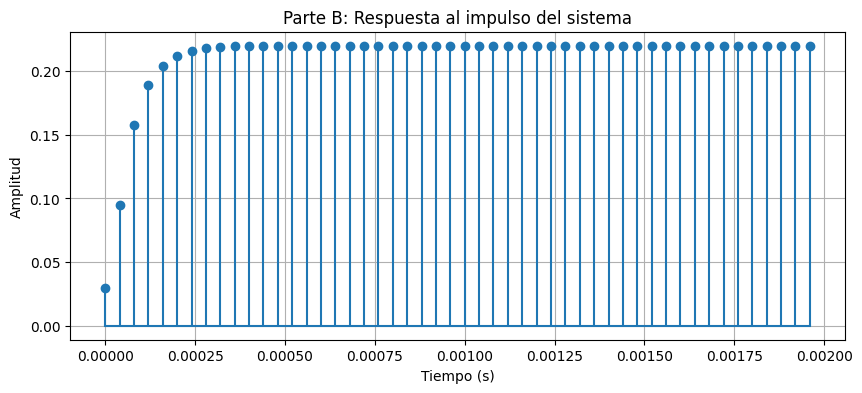

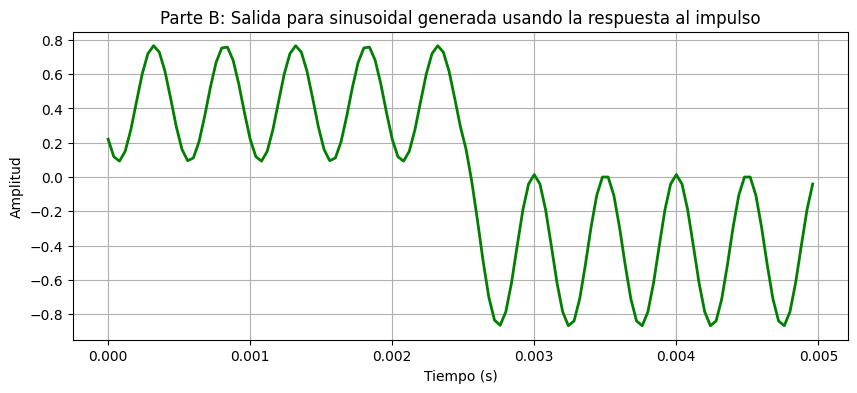

In [232]:
# Usar la respuesta al impulso para generar la salida de la sinusoidal por convolución
y_senoidal_conv = np.convolve(sinusoidal, h, mode='same')[:N]

# Graficar la respuesta al impulso
plt.figure(figsize=(10, 4))
plt.stem(t[:50], h[:50], basefmt='C0-')
plt.title('Parte B: Respuesta al impulso del sistema')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# Graficar la salida generada usando la respuesta al impulso
plt.figure(figsize=(10, 4))
plt.plot(t, y_senoidal_conv, 'g-', linewidth=2)
plt.title('Parte B: Salida para sinusoidal generada usando la respuesta al impulso')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

In [233]:
# Mostrar resultados del punto C
print(" C: Parámetros de simulación y energía/potencia")

print(f"Frecuencia de muestreo: {fs} Hz")
print(f"Tiempo de simulación: {T} s")
print(f"Número de muestras: {N}")


 C: Parámetros de simulación y energía/potencia
Frecuencia de muestreo: 25000 Hz
Tiempo de simulación: 0.005 s
Número de muestras: 125


a energía para una señal discreta x[n] se define como:
E = Σ |x[n]|²

In [262]:
# Sistema 1: y[n] = x[n] + 3·x[n-10]
# Configuración
fs = 10000    # Frecuencia de muestreo (10kHz)
T = 0.05      # Tiempo de simulación (50ms)
N = int(fs * T)
t = np.arange(N) / fs  # Vector de tiempo



# Señal de entrada sinusoidal
f_senoidal = 500  # 500 Hz
x_sen = np.sin(2 * np.pi * f_senoidal * t)


b1 = np.array([1.0] + [0]*9 + [3.0])  # [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]
a1 = np.array([1.0])

h1 = signal.lfilter(b1, a1, impulso)  # Respuesta al impulso del sistema 1
y1_sen = signal.lfilter(b1, a1, x_sen)  # Respuesta a la señal sinusoidal

In [263]:
# Sistema 2: y[n] = x[n] + 3·y[n-10]

b2 = np.array([1.0])  # [1]
a2 = np.array([1.0] + [0]*9 + [-3.0])  # [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3]

h2 = signal.lfilter(b2, a2, impulso)  # Respuesta al impulso del sistema 2
y2_sen = signal.lfilter(b2, a2, x_sen)  # Respuesta a la señal sinusoidal

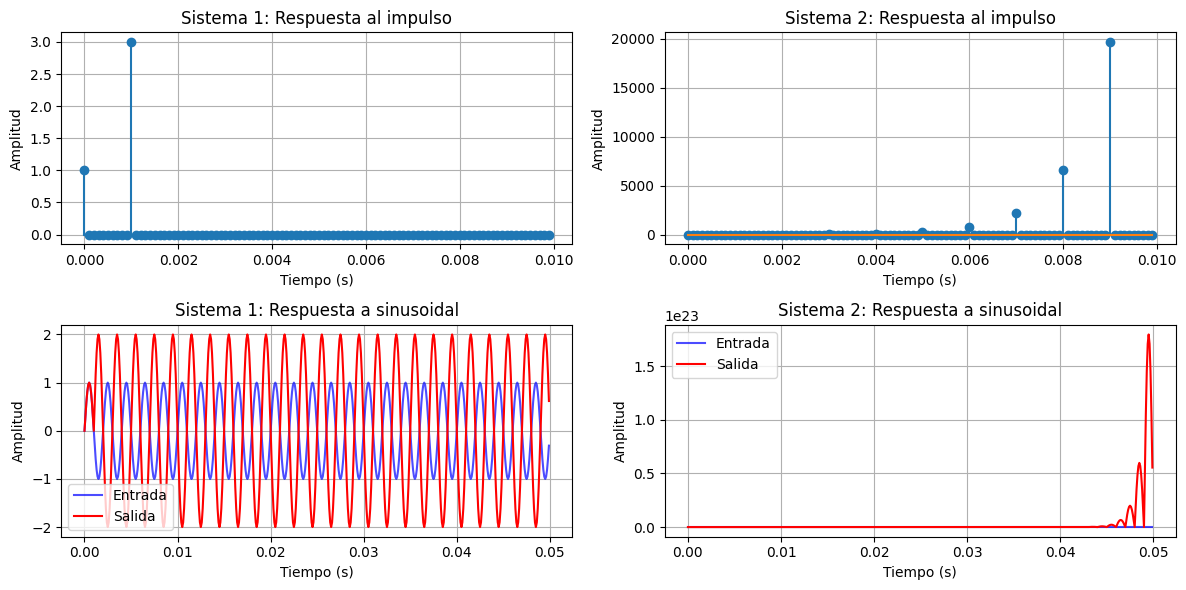

In [264]:
# Figura 1: Respuestas al impulso
plt.figure(figsize=(12, 6))

# Sistema 1
plt.subplot(2, 2, 1)
plt.stem(t[:100], h1[:100], basefmt='C0-')
plt.title('Sistema 1: Respuesta al impulso')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

# Sistema 2
plt.subplot(2, 2, 2)
plt.stem(t[:100], h2[:100], basefmt='C1-')
plt.title('Sistema 2: Respuesta al impulso')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

# Figura 2: Respuestas a la señal sinusoidal
plt.subplot(2, 2, 3)
plt.plot(t, x_sen, 'b-', label='Entrada', alpha=0.7)
plt.plot(t, y1_sen, 'r-', label='Salida')
plt.title('Sistema 1: Respuesta a sinusoidal')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(t, x_sen, 'b-', label='Entrada', alpha=0.7)
plt.plot(t, y2_sen, 'r-', label='Salida')
plt.title('Sistema 2: Respuesta a sinusoidal')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Conclusion
Se puede observar que el sistema 1 es estable; es decir, la respuesta al impulso es acotada y tiene sentido, debido a que es un sistema no recursivo y estos tienen respuesta al impulso finita.

Por otro lado, el sistema 2 muestra una amplificación progresiva a medida que transcurre el tiempo, lo que podria indicar un comportamiento inestable

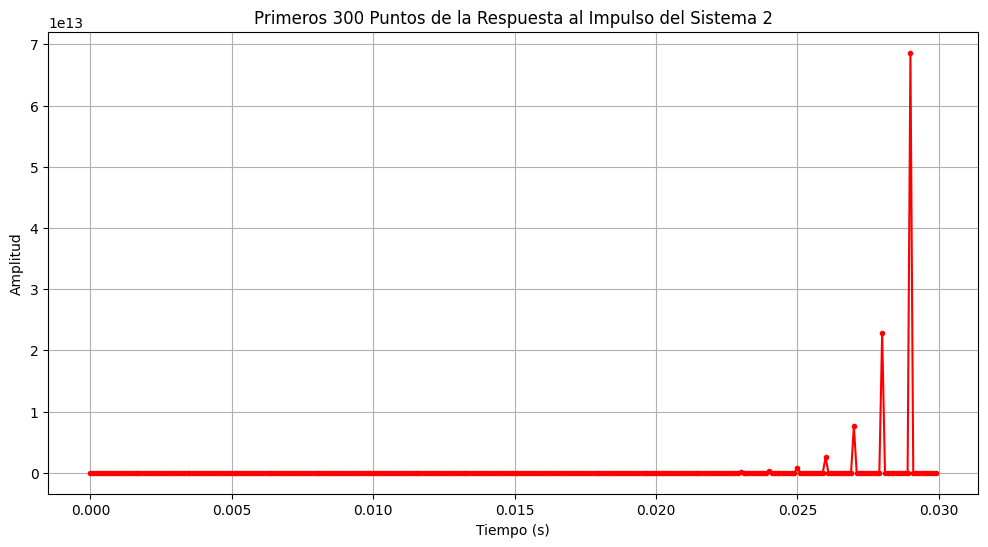

In [273]:
# los primeros 300 puntos
plt.figure(figsize=(12, 6))
plt.plot(t[:300], h2[:300], 'r-', linewidth=1.5, marker='o', markersize=3)
plt.title('Primeros 300 Puntos de la Respuesta al Impulso del Sistema 2')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.show()
